# Yhills Capstone project - Defaulter Problem

### Submitted by :
### Name: S Bhavesh Kumar
### Phone - 9059344278
### email - sbkumar2402@gmail.com

## Problem Statement : To predict whether the given person is defaulter or not

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

# Classifiers

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,BaggingClassifier,RandomForestClassifier

#Model Evaluation Tools
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

#Data processing Functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#warnings
import warnings
warnings.filterwarnings('ignore') 

In [157]:
df = pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/Yhills_July12_Analytics/main/credit.csv')
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [158]:
df.sample(20)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
108,< 0 DM,24,good,furniture/appliances,7721,unknown,< 1 year,1,2,30,none,own,1,skilled,1,yes,no
678,< 0 DM,24,good,furniture/appliances,2384,< 100 DM,> 7 years,4,4,64,bank,rent,1,unskilled,1,no,no
530,1 - 200 DM,36,good,education,2273,< 100 DM,4 - 7 years,3,1,32,none,own,2,skilled,2,no,no
225,unknown,36,perfect,renovations,2613,< 100 DM,1 - 4 years,4,2,27,none,own,2,skilled,1,no,no
270,unknown,18,good,car,2662,unknown,4 - 7 years,4,3,32,none,own,1,skilled,1,no,no
362,> 200 DM,12,poor,car,2247,< 100 DM,1 - 4 years,2,2,36,store,own,2,skilled,1,yes,no
773,unknown,24,critical,furniture/appliances,2223,100 - 500 DM,> 7 years,4,4,52,bank,own,2,skilled,1,no,no
271,unknown,12,critical,furniture/appliances,1402,500 - 1000 DM,4 - 7 years,3,4,37,none,rent,1,skilled,1,yes,no
128,1 - 200 DM,12,critical,car,1860,< 100 DM,unemployed,4,2,34,none,own,2,management,1,yes,no
755,< 0 DM,24,good,car,1285,unknown,4 - 7 years,4,4,32,none,rent,1,skilled,1,no,yes


In [159]:
df.shape

(1000, 17)

In [160]:
df.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_duration     object
percent_of_income        int64
years_at_residence       int64
age                      int64
other_credit            object
housing                 object
existing_loans_count     int64
job                     object
dependents               int64
phone                   object
default                 object
dtype: object

In [161]:
'''I believe there are some columns/attributes which are not a big factor to determine whether a person would be a defaulter or not.
So I'm gonna remove
purpose,years_at_residence,housing,phone'''
#df.drop(['purpose','years_at_residence','housing','phone'],axis = 1,inplace = True)

"I believe there are some columns/attributes which are not a big factor to determine whether a person would be a defaulter or not.\nSo I'm gonna remove\npurpose,years_at_residence,housing,phone"

### Here we have ranged values , first we need to fix that then we can go forward 

#### For less than 0 I'm going for -1 and other ranges I'm going for mean and for the upper bounds like"> 1000 DM" I'm assigning a higher number


In [162]:
df['checking_balance'] = df['checking_balance'].replace(to_replace = 'unknown',value = np.nan) 
df['checking_balance'] = df['checking_balance'].replace(to_replace = '< 0 DM',value = float(-1))
df['checking_balance'] = df['checking_balance'].replace(to_replace = '1 - 200 DM',value = float(100)) 
df['checking_balance'] = df['checking_balance'].replace(to_replace = '> 200 DM',value = float(300)) 

In [163]:
df['savings_balance'] = df['savings_balance'].replace(to_replace = 'unknown',value = np.nan) 
df['savings_balance'] = df['savings_balance'].replace(to_replace = '< 100 DM',value = float(50))
df['savings_balance'] = df['savings_balance'].replace(to_replace = '> 1000 DM',value = float(1500)) 
df['savings_balance'] = df['savings_balance'].replace(to_replace = '500 - 1000 DM',value = float(750))
df['savings_balance'] = df['savings_balance'].replace(to_replace = '100 - 500 DM',value = float(250)) 

In [164]:
df['employment_duration'] = df['employment_duration'].replace(to_replace = 'unemployed',value = float(0)) 
df['employment_duration'] = df['employment_duration'].replace(to_replace = '> 7 years',value = int(8)) 
df['employment_duration'] = df['employment_duration'].replace(to_replace = '4 - 7 years',value = float(5.5)) 
df['employment_duration'] = df['employment_duration'].replace(to_replace = '1 - 4 years',value = float(2.5)) 
df['employment_duration'] = df['employment_duration'].replace(to_replace = '< 1 year',value = float(0.5)) 

## Plots

In [165]:
df.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

<AxesSubplot:xlabel='purpose', ylabel='count'>

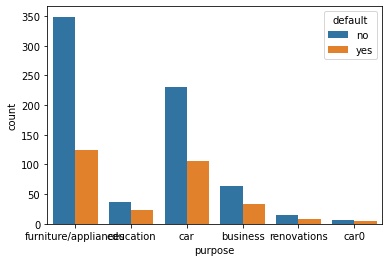

In [166]:
sns.countplot(x='purpose',hue='default',data =df)

People who take loans for furniture/appliances have less chances of becoming a defaulter

<AxesSubplot:xlabel='housing', ylabel='count'>

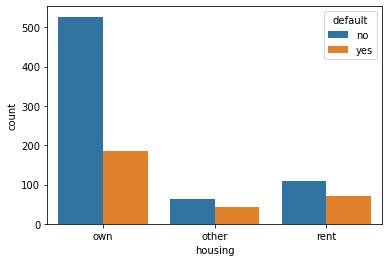

In [167]:
sns.countplot(x='housing',hue='default',data =df)

People who take loans but have their own house have less chances of becoming a defaulter

<AxesSubplot:xlabel='job', ylabel='count'>

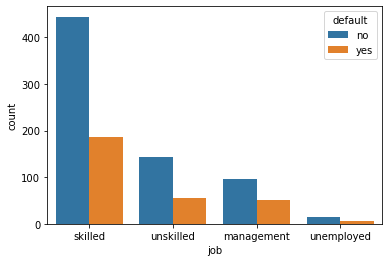

In [168]:
sns.countplot(x='job',hue='default',data =df)

Skilled people have less chances of becoming a defaulter

<AxesSubplot:xlabel='credit_history', ylabel='count'>

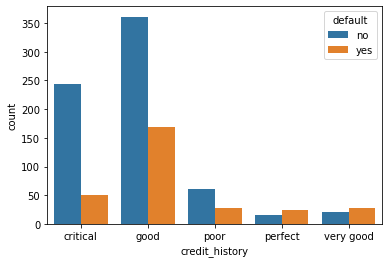

In [169]:
sns.countplot(x='credit_history',hue='default',data =df)

Among all , the ones with 'very good' or 'perfect' credit history has more chances of becoming defaulter rather than not becoming a defaulter

<AxesSubplot:xlabel='other_credit', ylabel='count'>

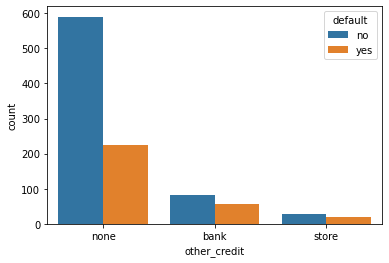

In [170]:
sns.countplot(x='other_credit',hue='default',data =df)

In [171]:
corr = df.corr()

<AxesSubplot:>

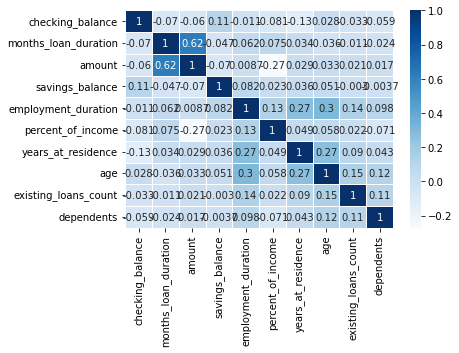

In [172]:
sns.heatmap(corr,annot= True,linewidths = 1,cmap='Blues')

There's a good positive correlation between months_loan_duration and amount

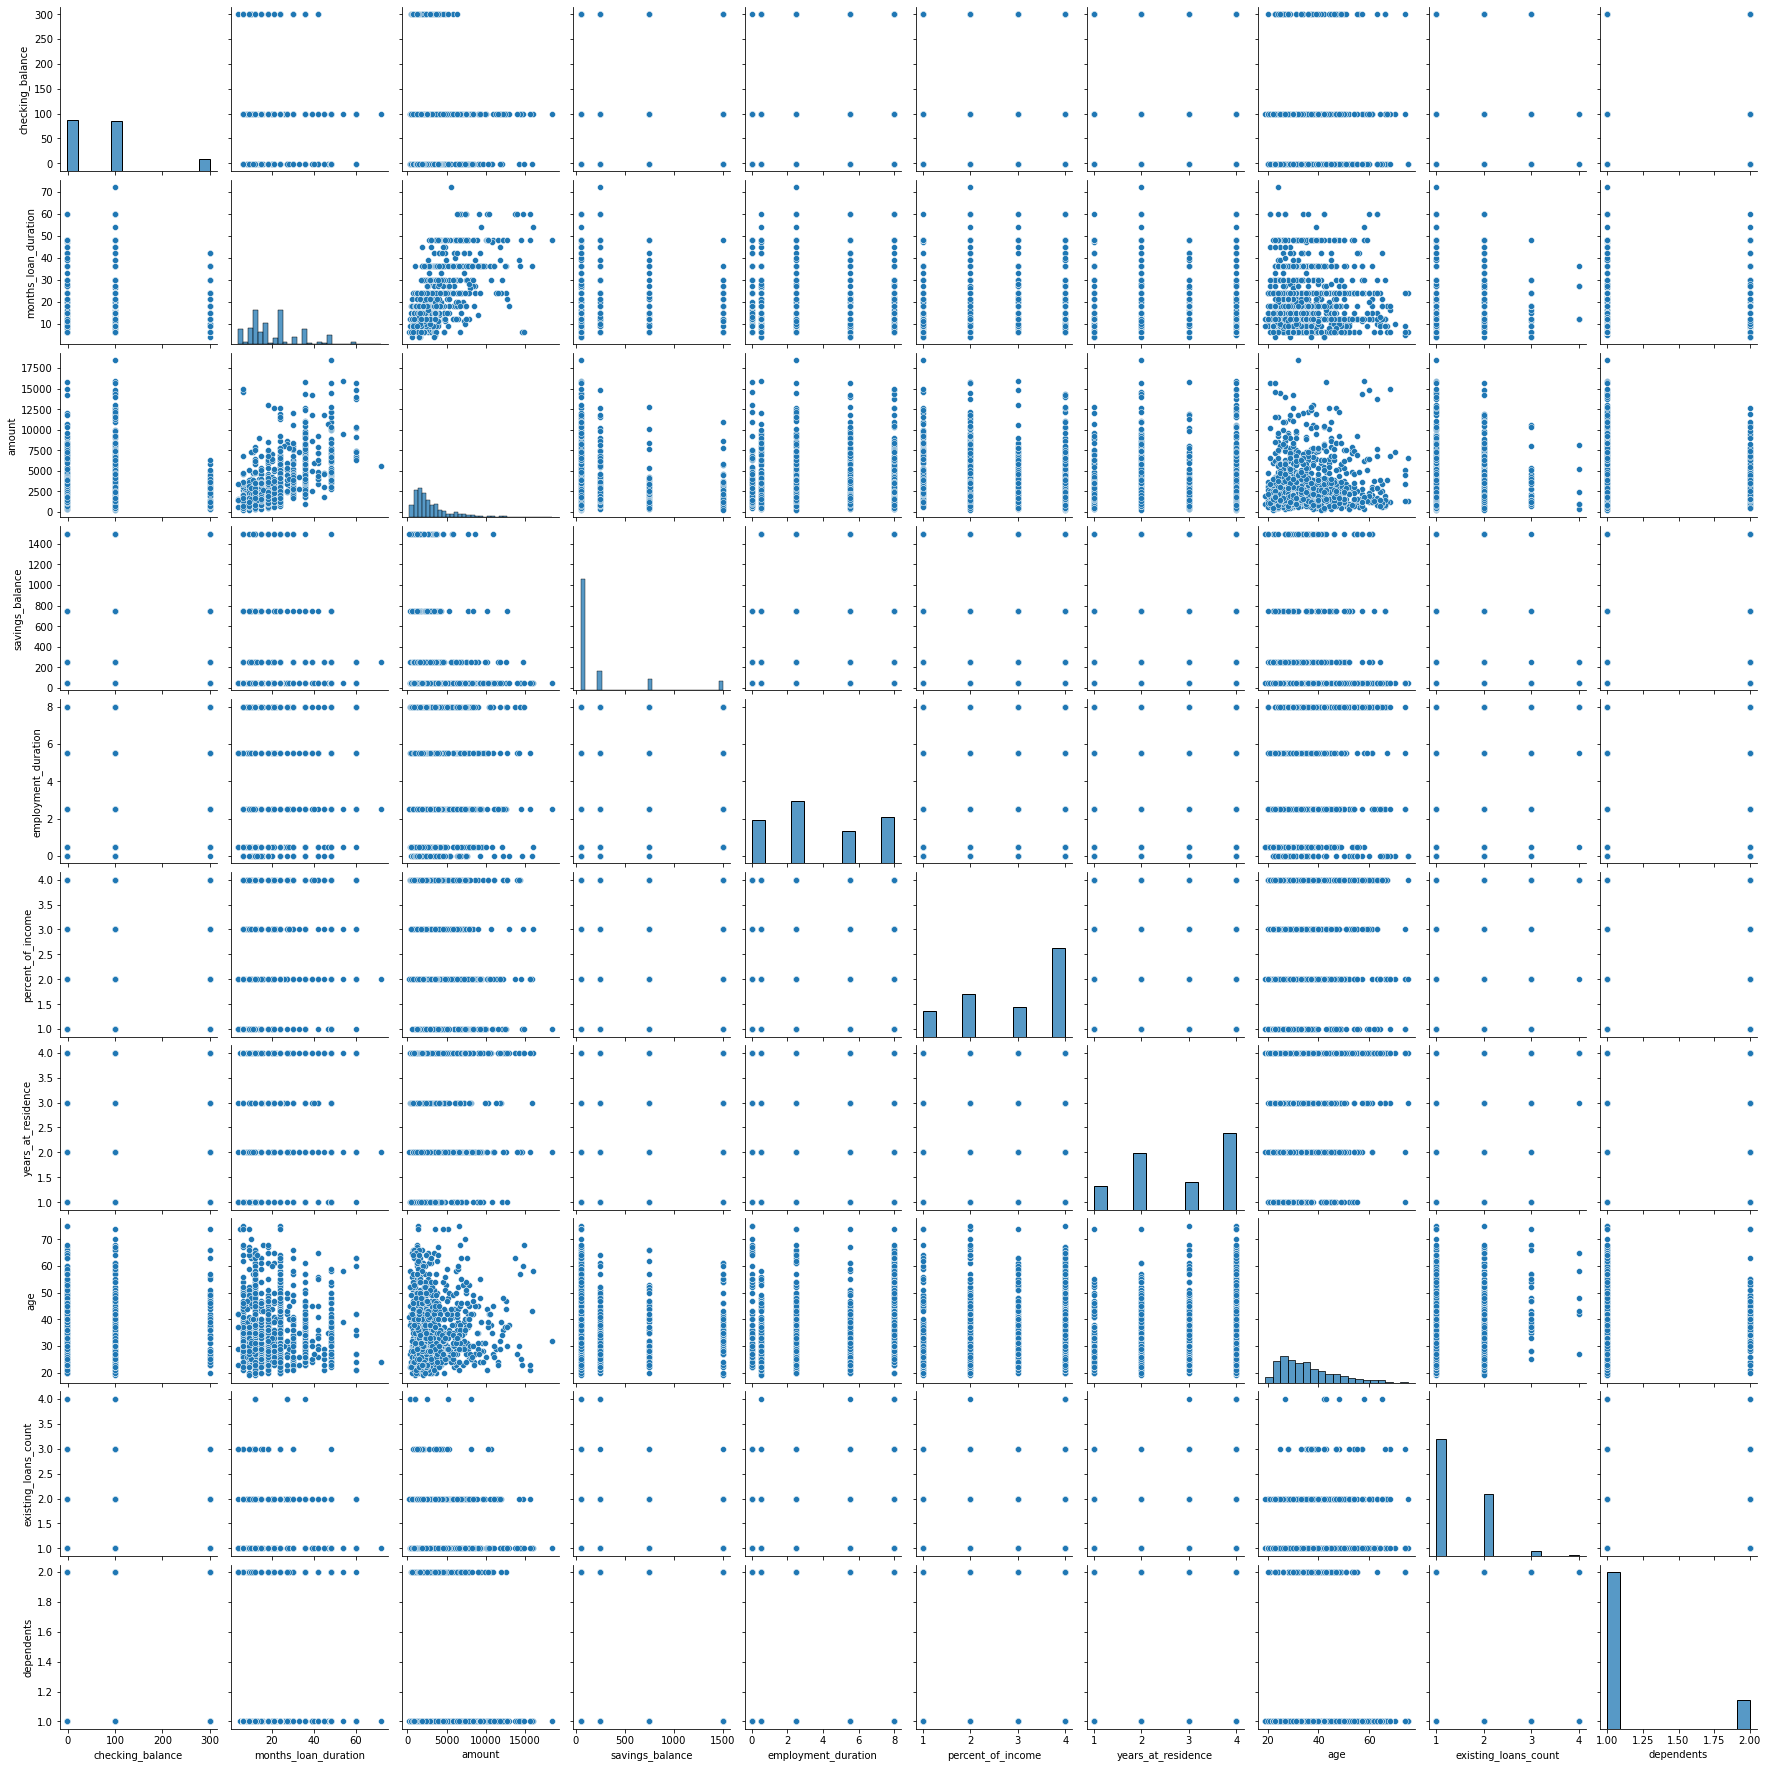

In [173]:
sns.pairplot(df)
plt.show()

In [174]:
df.describe()

,checking_balance,months_loan_duration,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,606.000000,1000.000000,1000.000000,817.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,75.125413,20.903000,3271.258000,214.381885,3.914500,2.973000,2.845000,35.546000,1.407000,1.155000
std,90.363037,12.058814,2822.736876,373.499470,2.881361,1.118715,1.103718,11.375469,0.577654,0.362086
min,-1.000000,4.000000,250.000000,50.000000,0.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,-1.000000,12.000000,1365.500000,50.000000,2.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,100.000000,18.000000,2319.500000,50.000000,2.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,100.000000,24.000000,3972.250000,250.000000,8.000000,4.000000,4.000000,42.000000,2.000000,1.000000
max,300.000000,72.000000,18424.000000,1500.000000,8.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   checking_balance      606 non-null    float64
 1   months_loan_duration  1000 non-null   int64  
 2   credit_history        1000 non-null   object 
 3   purpose               1000 non-null   object 
 4   amount                1000 non-null   int64  
 5   savings_balance       817 non-null    float64
 6   employment_duration   1000 non-null   float64
 7   percent_of_income     1000 non-null   int64  
 8   years_at_residence    1000 non-null   int64  
 9   age                   1000 non-null   int64  
 10  other_credit          1000 non-null   object 
 11  housing               1000 non-null   object 
 12  existing_loans_count  1000 non-null   int64  
 13  job                   1000 non-null   object 
 14  dependents            1000 non-null   int64  
 15  phone                 

In [176]:
print(df['credit_history'].value_counts())
print(df['purpose'].value_counts())
print(df['other_credit'].value_counts())
print(df['housing'].value_counts())
print(df['job'].value_counts())
print(df['phone'].value_counts())

good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64
none     814
bank     139
store     47
Name: other_credit, dtype: int64
own      713
rent     179
other    108
Name: housing, dtype: int64
skilled       630
unskilled     200
management    148
unemployed     22
Name: job, dtype: int64
no     596
yes    404
Name: phone, dtype: int64


## Null values

<AxesSubplot:>

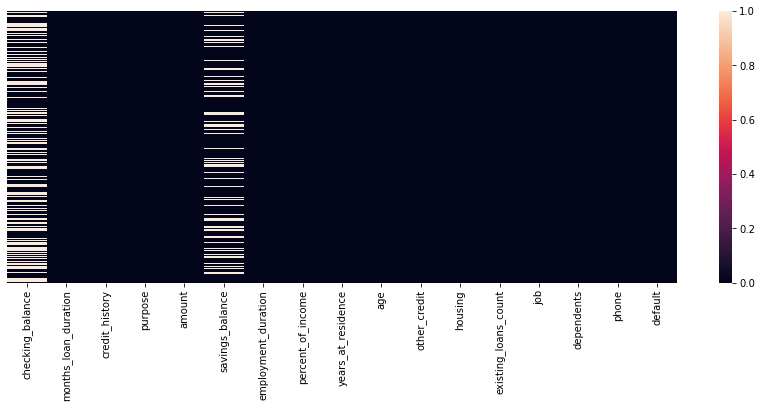

In [177]:
plt.figure(figsize=(15,5))

sns.heatmap(df.isnull(),yticklabels = False)

In [178]:
median1 = df['checking_balance'].median()
df['checking_balance'].replace(np.nan,median1,inplace = True)

median2 = df['savings_balance'].median()
df['savings_balance'].replace(np.nan,median2,inplace = True)

<AxesSubplot:>

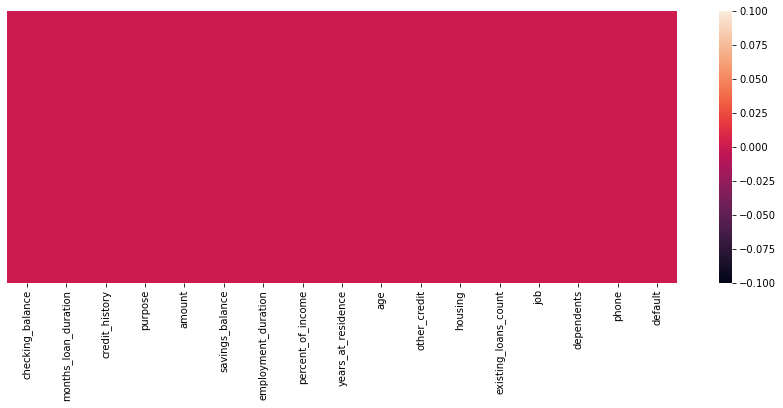

In [179]:
plt.figure(figsize=(15,5))

sns.heatmap(df.isnull(),yticklabels = False)

## Outliers 

<AxesSubplot:xlabel='existing_loans_count', ylabel='default'>

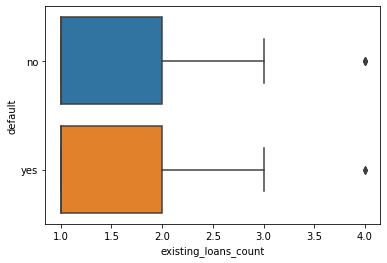

In [180]:
sns.boxplot(x = 'existing_loans_count',y = 'default',data=df)

<AxesSubplot:xlabel='percent_of_income', ylabel='default'>

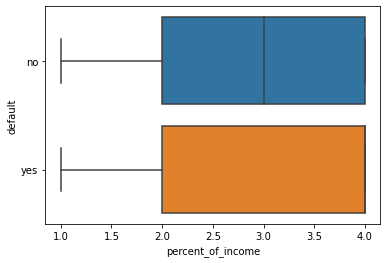

In [181]:
sns.boxplot(x = 'percent_of_income',y = 'default',data=df)

<AxesSubplot:xlabel='months_loan_duration', ylabel='default'>

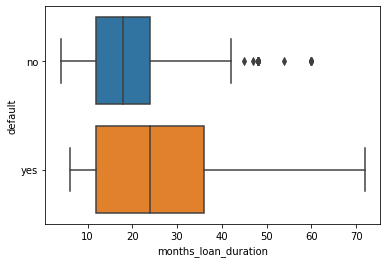

In [182]:
sns.boxplot(x = 'months_loan_duration',y = 'default',data=df)

<AxesSubplot:xlabel='amount', ylabel='default'>

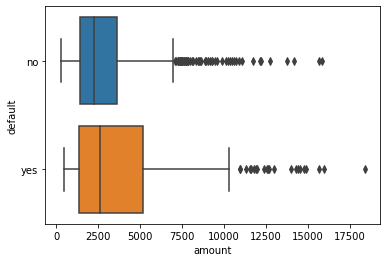

In [183]:
sns.boxplot(x = 'amount',y = 'default',data=df)

A lot of outliers !!!

In [184]:
def remove_outlier(col):
    sorted(col)
    q1,q3 = col.quantile([0.25,0.75])
    iqr = q3-q1
    low_range = q1 - (1.5*iqr)
    up_range = q3 + (1.5*iqr)
    return low_range,up_range   

In [185]:
low,up = remove_outlier(df['amount'])
df['amount'] = np.where(df['amount']>up,up,df['amount'])
df['amount'] = np.where(df['amount']<low,low,df['amount'])

In [186]:
low,up = remove_outlier(df['months_loan_duration'])
df['months_loan_duration'] = np.where(df['months_loan_duration']>up,up,df['months_loan_duration'])
df['months_loan_duration'] = np.where(df['months_loan_duration']<low,low,df['months_loan_duration'])

## Duplicates

In [187]:
dup = df.duplicated()
print(dup.sum())
df[dup]

0


,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default


# One hot encoding

In [188]:
#dummies = pd.get_dummies(df[['credit_history','other_credit','job']],
 #                       columns = ['credit_history','other_credit','job'])
dummies = pd.get_dummies(df[['credit_history','purpose','other_credit','housing','job','phone']],
                       columns = ['credit_history','purpose','other_credit','housing','job','phone'])


In [189]:
#columns = ['credit_history','other_credit','job']
columns = ['credit_history','purpose','other_credit','housing','job','phone']
df = pd.concat([df,dummies],axis =1)
df.drop(columns,axis=1,inplace = True)

In [190]:
df.sample(15)

,checking_balance,months_loan_duration,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,dependents,...,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes
330,-1.0,24.0,6615.0,50.0,0.0,2,4,75,2,1,...,0,1,0,0,1,0,0,0,0,1
234,100.0,4.0,1544.0,50.0,5.5,2,1,42,3,2,...,0,0,1,0,0,0,0,1,1,0
685,100.0,42.0,6527.0,50.0,2.5,4,4,34,1,2,...,0,1,0,0,0,1,0,0,0,1
299,100.0,21.0,2745.0,1500.0,5.5,3,2,32,2,1,...,0,0,1,0,0,1,0,0,0,1
503,100.0,24.0,1216.0,250.0,0.5,4,4,38,2,2,...,0,0,1,0,0,1,0,0,1,0
599,100.0,24.0,3863.0,50.0,2.5,1,2,32,1,1,...,0,1,0,0,0,1,0,0,1,0
668,-1.0,12.0,4843.0,50.0,8.0,3,4,43,2,1,...,0,0,0,1,0,1,0,0,0,1
81,100.0,15.0,1213.0,750.0,8.0,4,3,47,1,1,...,1,0,1,0,0,1,0,0,0,1
857,100.0,15.0,3343.0,50.0,2.5,4,2,28,1,1,...,0,1,0,0,0,1,0,0,0,1
822,-1.0,36.0,2712.0,50.0,8.0,2,2,41,1,2,...,0,0,1,0,0,1,0,0,1,0


In [191]:
df.dtypes

checking_balance                float64
months_loan_duration            float64
amount                          float64
savings_balance                 float64
employment_duration             float64
percent_of_income                 int64
years_at_residence                int64
age                               int64
existing_loans_count              int64
dependents                        int64
default                          object
credit_history_critical           uint8
credit_history_good               uint8
credit_history_perfect            uint8
credit_history_poor               uint8
credit_history_very good          uint8
purpose_business                  uint8
purpose_car                       uint8
purpose_car0                      uint8
purpose_education                 uint8
purpose_furniture/appliances      uint8
purpose_renovations               uint8
other_credit_bank                 uint8
other_credit_none                 uint8
other_credit_store                uint8


### First I'm going to find the results without Scaling the data

# Splitting the Data

In [192]:
y = df[['default']]
X = df.drop(['default'],axis=1)

In [193]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state =1)

## Logistic Regression

In [194]:
reg_model = LogisticRegression(solver = 'liblinear')
reg_model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [442]:
print(reg_model.score(X_train,y_train)*100,'%')
print(reg_model.score(X_test,y_test)*100,'%')

72.28571428571429 %
71.33333333333334 %


              precision    recall  f1-score   support

          no       0.73      0.94      0.82       214
         yes       0.50      0.15      0.23        86

    accuracy                           0.71       300
   macro avg       0.62      0.55      0.53       300
weighted avg       0.67      0.71      0.65       300

Accuracy: 74.43 %


<AxesSubplot:>

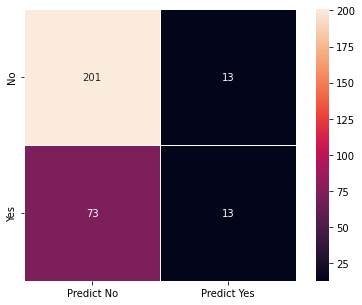

In [443]:
y_pred = reg_model.predict(X_test)
accuracies = cross_val_score(estimator = reg_model,X= X_train,y=y_train,cv=10)
print(classification_report(y_test,y_pred))
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

cm = confusion_matrix(y_test,y_pred,labels = ["no","yes"])
df_cm = pd.DataFrame(cm,index=[i for i in ["No","Yes"]],columns = [i for i in["Predict No","Predict Yes"]])
plt.figure(figsize=(7,5))
sns.heatmap(data=df_cm,linewidths=.5, annot=True,square = True,fmt = 'g')

A general score for now,but the overfitting is not going for most combinations of hyperparameters let's see if we can do any better

### KNN Classifier

In [198]:
knn = KNeighborsClassifier(n_neighbors=7,p =2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [199]:
print(knn.score(X_train,y_train)*100,'%')
print(knn.score(X_test,y_test)*100,'%')

74.85714285714286 %
71.66666666666667 %


              precision    recall  f1-score   support

          no       0.77      0.87      0.81       214
         yes       0.51      0.34      0.41        86

    accuracy                           0.72       300
   macro avg       0.64      0.60      0.61       300
weighted avg       0.69      0.72      0.70       300

Accuracy: 68.43 %


<AxesSubplot:>

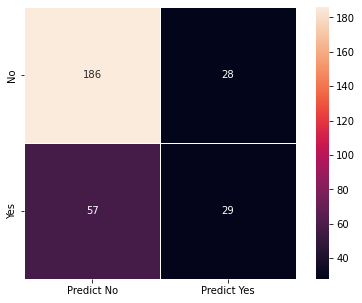

In [266]:
y_pred = knn.predict(X_test)
accuracies = cross_val_score(estimator = knn,X= X_train,y=y_train,cv=10)
print(classification_report(y_test,y_pred))
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

cm = confusion_matrix(y_test,y_pred,labels = ["no","yes"])
df_cm = pd.DataFrame(cm,index=[i for i in ["No","Yes"]],columns = [i for i in["Predict No","Predict Yes"]])
plt.figure(figsize=(7,5))
sns.heatmap(data=df_cm,linewidths=.5, annot=True,square = True,fmt = 'g')


A bad score with little bit of overfitting the model was not giving any better score than this.

### Decision Tree 

In [202]:
tree = DecisionTreeClassifier(max_depth = 4,random_state = 1 )
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [203]:
print(tree.score(X_train,y_train)*100,'%')
print(tree.score(X_test,y_test)*100,'%')

75.71428571428571 %
74.33333333333333 %


              precision    recall  f1-score   support

          no       0.79      0.86      0.83       214
         yes       0.57      0.44      0.50        86

    accuracy                           0.74       300
   macro avg       0.68      0.65      0.66       300
weighted avg       0.73      0.74      0.73       300

Accuracy: 69.86 %


<AxesSubplot:>

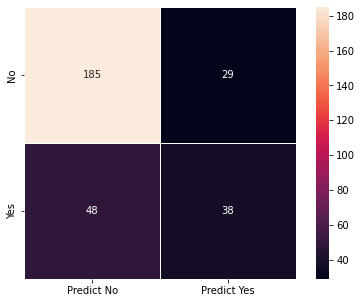

In [265]:
y_pred = tree.predict(X_test)
accuracies = cross_val_score(estimator = tree,X= X_train,y=y_train,cv=10)
print(classification_report(y_test,y_pred))
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

cm = confusion_matrix(y_test,y_pred,labels = ["no","yes"])
df_cm = pd.DataFrame(cm,index=[i for i in ["No","Yes"]],columns = [i for i in["Predict No","Predict Yes"]])
plt.figure(figsize=(7,5))
sns.heatmap(data=df_cm,linewidths=.5, annot=True,square = True,fmt = 'g')


### Random Forest

In [206]:
rf = RandomForestClassifier(n_estimators=200,random_state=0,max_depth=3,max_features=4)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, max_features=4, n_estimators=200,
                       random_state=0)

In [436]:
print(rf.score(X_train,y_train)*100,'%')
print(rf.score(X_test,y_test)*100,'%')

76.0 %
71.33333333333334 %


              precision    recall  f1-score   support

          no       0.72      0.98      0.83       214
         yes       0.50      0.06      0.10        86

    accuracy                           0.71       300
   macro avg       0.61      0.52      0.47       300
weighted avg       0.66      0.71      0.62       300

Accuracy: 72.14 %


<AxesSubplot:>

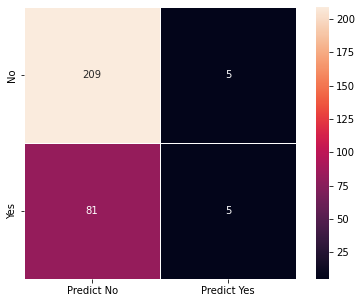

In [437]:
y_pred = rf.predict(X_test)
accuracies = cross_val_score(estimator = rf,X= X_train,y=y_train,cv=10)
print(classification_report(y_test,y_pred))
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

cm = confusion_matrix(y_test,y_pred,labels = ["no","yes"])
df_cm = pd.DataFrame(cm,index=[i for i in ["No","Yes"]],columns = [i for i in["Predict No","Predict Yes"]])
plt.figure(figsize=(7,5))
sns.heatmap(data=df_cm,linewidths=.5, annot=True,square = True,fmt = 'g')


In this one I have tried to reduce the overfitting as well as trying to reduce the False Negative case of the situation.
As if we predict he's not a defaulter and he turns out to be a defaulter then its the worst case possible. But the random forest is not best suited for this data we'll check another one

### AdaBoost

In [254]:
adb = AdaBoostClassifier(random_state =2,learning_rate = 0.6,n_estimators = 10)
adb.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.6, n_estimators=10, random_state=2)

In [262]:
print(adb.score(X_train,y_train)*100,'%')
print(adb.score(X_test,y_test)*100,'%')

76.0 %
72.0 %


              precision    recall  f1-score   support

          no       0.75      0.91      0.82       214
         yes       0.53      0.24      0.33        86

    accuracy                           0.72       300
   macro avg       0.64      0.58      0.58       300
weighted avg       0.69      0.72      0.68       300

Accuracy: 73.29 %


<AxesSubplot:>

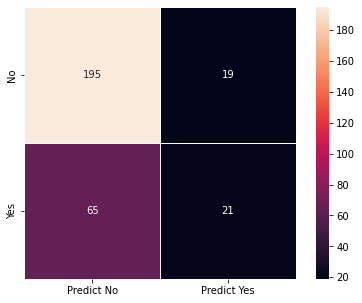

In [263]:
y_pred = adb.predict(X_test)
accuracies = cross_val_score(estimator = adb,X= X_train,y=y_train)
print(classification_report(y_test,y_pred))
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

cm = confusion_matrix(y_test,y_pred,labels = ["no","yes"])
df_cm = pd.DataFrame(cm,index=[i for i in ["No","Yes"]],columns = [i for i in["Predict No","Predict Yes"]])
plt.figure(figsize=(7,5))
sns.heatmap(data=df_cm,linewidths=.5, annot=True,square = True,fmt = 'g')


### GradientBoosting 

In [300]:
gdb = GradientBoostingClassifier(loss='exponential',learning_rate=0.05,n_estimators=200,criterion='mae',)
gdb.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mae', learning_rate=0.05,
                           loss='exponential', n_estimators=200)

In [301]:
print(gdb.score(X_train,y_train)*100,'%')
print(gdb.score(X_test,y_test)*100,'%')

73.71428571428571 %
72.0 %


              precision    recall  f1-score   support

          no       0.75      0.92      0.82       214
         yes       0.53      0.23      0.32        86

    accuracy                           0.72       300
   macro avg       0.64      0.57      0.57       300
weighted avg       0.68      0.72      0.68       300

Accuracy: 70.29 %


<AxesSubplot:>

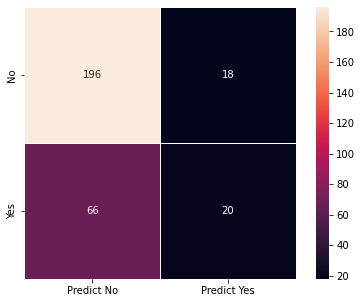

In [302]:
y_pred = gdb.predict(X_test)
accuracies = cross_val_score(estimator = gdb,X= X_train,y=y_train,cv=10)
print(classification_report(y_test,y_pred))
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

cm = confusion_matrix(y_test,y_pred,labels = ["no","yes"])
df_cm = pd.DataFrame(cm,index=[i for i in ["No","Yes"]],columns = [i for i in["Predict No","Predict Yes"]])
plt.figure(figsize=(7,5))
sns.heatmap(data=df_cm,linewidths=.5, annot=True,square = True,fmt = 'g')


### Bagging Classifier

In [337]:
bgc = BaggingClassifier(n_estimators = 5,random_state=1)
bgc.fit(X_train,y_train)

BaggingClassifier(n_estimators=5, random_state=1)

In [338]:
print(bgc.score(X_train,y_train)*100,'%')
print(bgc.score(X_test,y_test)*100,'%')

95.85714285714285 %
75.0 %


In [339]:
y_pred = bgc.predict(X_test)
accuracies = cross_val_score(estimator = bgc,X= X_train,y=y_train,cv=10)
print(classification_report(y_test,y_pred))
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

              precision    recall  f1-score   support

          no       0.80      0.86      0.83       214
         yes       0.58      0.47      0.52        86

    accuracy                           0.75       300
   macro avg       0.69      0.66      0.67       300
weighted avg       0.74      0.75      0.74       300

Accuracy: 68.86 %


<AxesSubplot:>

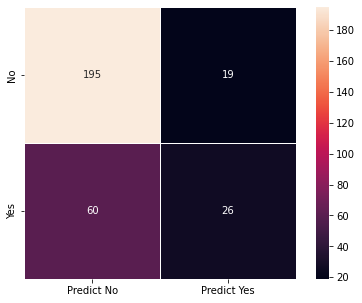

In [221]:
cm = confusion_matrix(y_test,y_pred,labels = ["no","yes"])
df_cm = pd.DataFrame(cm,index=[i for i in ["No","Yes"]],columns = [i for i in["Predict No","Predict Yes"]])
plt.figure(figsize=(7,5))
sns.heatmap(data=df_cm,linewidths=.5, annot=True,square = True,fmt = 'g')


## SVM

In [370]:
svm = SVC(kernel='linear',C=1.0,gamma='auto',degree = 2)
svm.fit(X_train,y_train)

SVC(degree=2, gamma='auto', kernel='linear')

In [371]:
print(svm.score(X_train,y_train)*100,'%')
print(svm.score(X_test,y_test)*100,'%')

68.28571428571428 %
64.66666666666666 %


              precision    recall  f1-score   support

          no       0.79      0.68      0.73       214
         yes       0.41      0.56      0.48        86

    accuracy                           0.65       300
   macro avg       0.60      0.62      0.60       300
weighted avg       0.68      0.65      0.66       300

Accuracy: 67.14 %


<AxesSubplot:>

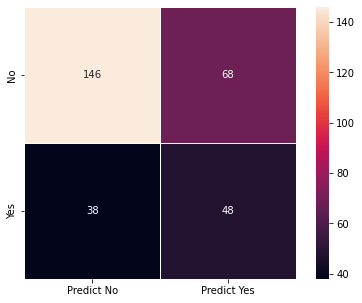

In [372]:
y_pred = svm.predict(X_test)
accuracies = cross_val_score(estimator = svm,X= X_train,y=y_train,cv=10)
print(classification_report(y_test,y_pred))
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

cm = confusion_matrix(y_test,y_pred,labels = ["no","yes"])
df_cm = pd.DataFrame(cm,index=[i for i in ["No","Yes"]],columns = [i for i in["Predict No","Predict Yes"]])
plt.figure(figsize=(7,5))
sns.heatmap(data=df_cm,linewidths=.5, annot=True,square = True,fmt = 'g')


## Scaling

In [378]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std

StandardScaler()

In [379]:
df.dtypes

checking_balance                float64
months_loan_duration            float64
amount                          float64
savings_balance                 float64
employment_duration             float64
percent_of_income                 int64
years_at_residence                int64
age                             float64
existing_loans_count            float64
dependents                      float64
default                          object
credit_history_critical           uint8
credit_history_good               uint8
credit_history_perfect            uint8
credit_history_poor               uint8
credit_history_very good          uint8
purpose_business                  uint8
purpose_car                       uint8
purpose_car0                      uint8
purpose_education                 uint8
purpose_furniture/appliances      uint8
purpose_renovations               uint8
other_credit_bank                 uint8
other_credit_none                 uint8
other_credit_store                uint8


In [380]:
df['checking_balance'] = std.fit_transform(df[['checking_balance']])
df['savings_balance'] = std.fit_transform(df[['savings_balance']])
df['amount'] = std.fit_transform(df[['amount']])
df['months_loan_duration'] = std.fit_transform(df[['months_loan_duration']])
df['age'] = std.fit_transform(df[['age']])
df['dependents'] = std.fit_transform(df[['dependents']])
df['existing_loans_count'] = std.fit_transform(df[['existing_loans_count']])

In [381]:
X = df.drop('default',axis=1)
y = df['default']

In [382]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state =1)

## Logistic Regression

In [444]:
reg_model = LogisticRegression(solver = 'liblinear')
reg_model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [445]:
print(reg_model.score(X_train,y_train)*100,'%')
print(reg_model.score(X_test,y_test)*100,'%')

76.57142857142857 %
68.66666666666667 %


              precision    recall  f1-score   support

          no       0.74      0.86      0.80       214
         yes       0.42      0.26      0.32        86

    accuracy                           0.69       300
   macro avg       0.58      0.56      0.56       300
weighted avg       0.65      0.69      0.66       300

Accuracy: 74.43 %


<AxesSubplot:>

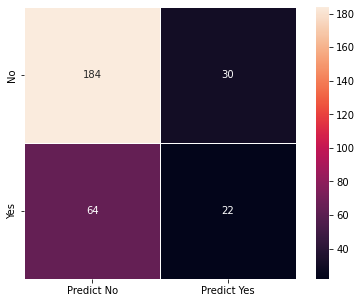

In [446]:
y_pred = reg_model.predict(X_test)
accuracies = cross_val_score(estimator = reg_model,X= X_train,y=y_train,cv=10)
print(classification_report(y_test,y_pred))
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

cm = confusion_matrix(y_test,y_pred,labels = ["no","yes"])
df_cm = pd.DataFrame(cm,index=[i for i in ["No","Yes"]],columns = [i for i in["Predict No","Predict Yes"]])
plt.figure(figsize=(7,5))
sns.heatmap(data=df_cm,linewidths=.5, annot=True,square = True,fmt = 'g')

### KNN Classifier

In [447]:
knn = KNeighborsClassifier(n_neighbors=7,p =2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [448]:
print(knn.score(X_train,y_train)*100,'%')
print(knn.score(X_test,y_test)*100,'%')

78.28571428571428 %
74.33333333333333 %


              precision    recall  f1-score   support

          no       0.76      0.93      0.84       214
         yes       0.62      0.28      0.38        86

    accuracy                           0.74       300
   macro avg       0.69      0.60      0.61       300
weighted avg       0.72      0.74      0.71       300

Accuracy: 71.71 %


<AxesSubplot:>

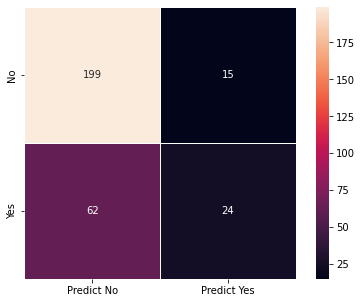

In [449]:
y_pred = knn.predict(X_test)
accuracies = cross_val_score(estimator = knn,X= X_train,y=y_train,cv=10)
print(classification_report(y_test,y_pred))
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

cm = confusion_matrix(y_test,y_pred,labels = ["no","yes"])
df_cm = pd.DataFrame(cm,index=[i for i in ["No","Yes"]],columns = [i for i in["Predict No","Predict Yes"]])
plt.figure(figsize=(7,5))
sns.heatmap(data=df_cm,linewidths=.5, annot=True,square = True,fmt = 'g')


## SVM

In [450]:
svm = SVC(kernel='poly',C=1.0,gamma='scale',degree = 3)
svm.fit(X_train,y_train)

SVC(kernel='poly')

In [451]:
print(svm.score(X_train,y_train)*100,'%')
print(svm.score(X_test,y_test)*100,'%')

77.57142857142857 %
73.33333333333333 %


              precision    recall  f1-score   support

          no       0.75      0.94      0.83       214
         yes       0.59      0.22      0.32        86

    accuracy                           0.73       300
   macro avg       0.67      0.58      0.58       300
weighted avg       0.71      0.73      0.69       300

Accuracy: 72.86 %


<AxesSubplot:>

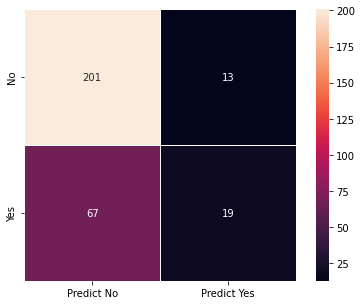

In [452]:
y_pred = svm.predict(X_test)
accuracies = cross_val_score(estimator = svm,X= X_train,y=y_train,cv=10)
print(classification_report(y_test,y_pred))
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

cm = confusion_matrix(y_test,y_pred,labels = ["no","yes"])
df_cm = pd.DataFrame(cm,index=[i for i in ["No","Yes"]],columns = [i for i in["Predict No","Predict Yes"]])
plt.figure(figsize=(7,5))
sns.heatmap(data=df_cm,linewidths=.5, annot=True,square = True,fmt = 'g')


### Decision Tree 

In [453]:
tree = DecisionTreeClassifier(max_depth = 4,random_state = 1 )
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [454]:
print(tree.score(X_train,y_train)*100,'%')
print(tree.score(X_test,y_test)*100,'%')

75.71428571428571 %
74.33333333333333 %


              precision    recall  f1-score   support

          no       0.79      0.86      0.83       214
         yes       0.57      0.44      0.50        86

    accuracy                           0.74       300
   macro avg       0.68      0.65      0.66       300
weighted avg       0.73      0.74      0.73       300

Accuracy: 69.86 %


<AxesSubplot:>

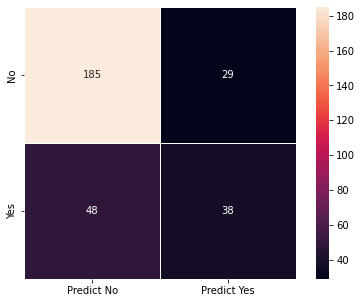

In [455]:
y_pred = tree.predict(X_test)
accuracies = cross_val_score(estimator = tree,X= X_train,y=y_train,cv=10)
print(classification_report(y_test,y_pred))
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

cm = confusion_matrix(y_test,y_pred,labels = ["no","yes"])
df_cm = pd.DataFrame(cm,index=[i for i in ["No","Yes"]],columns = [i for i in["Predict No","Predict Yes"]])
plt.figure(figsize=(7,5))
sns.heatmap(data=df_cm,linewidths=.5, annot=True,square = True,fmt = 'g')


### Random Forest

In [456]:
rf = RandomForestClassifier(n_estimators = 150,max_depth = 4)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=150)

In [457]:
print(rf.score(X_train,y_train)*100,'%')
print(rf.score(X_test,y_test)*100,'%')

75.28571428571429 %
71.66666666666667 %


              precision    recall  f1-score   support

          no       0.72      0.99      0.83       214
         yes       0.57      0.05      0.09        86

    accuracy                           0.72       300
   macro avg       0.65      0.52      0.46       300
weighted avg       0.68      0.72      0.62       300

Accuracy: 71.00 %


<AxesSubplot:>

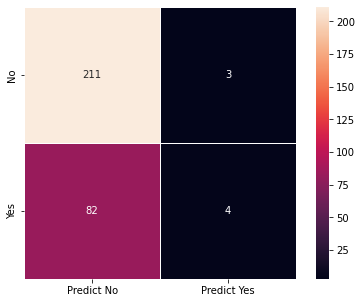

In [458]:
y_pred = rf.predict(X_test)
accuracies = cross_val_score(estimator = rf,X= X_train,y=y_train,cv=10)
print(classification_report(y_test,y_pred))
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

cm = confusion_matrix(y_test,y_pred,labels = ["no","yes"])
df_cm = pd.DataFrame(cm,index=[i for i in ["No","Yes"]],columns = [i for i in["Predict No","Predict Yes"]])
plt.figure(figsize=(7,5))
sns.heatmap(data=df_cm,linewidths=.5, annot=True,square = True,fmt = 'g')


### AdaBoost

In [459]:
adb = AdaBoostClassifier(random_state =2,learning_rate = 0.6,n_estimators = 10)
adb.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.6, n_estimators=10, random_state=2)

In [460]:
print(adb.score(X_train,y_train)*100,'%')
print(adb.score(X_test,y_test)*100,'%')

76.0 %
72.0 %


              precision    recall  f1-score   support

          no       0.75      0.91      0.82       214
         yes       0.53      0.24      0.33        86

    accuracy                           0.72       300
   macro avg       0.64      0.58      0.58       300
weighted avg       0.69      0.72      0.68       300

Accuracy: 73.29 %


<AxesSubplot:>

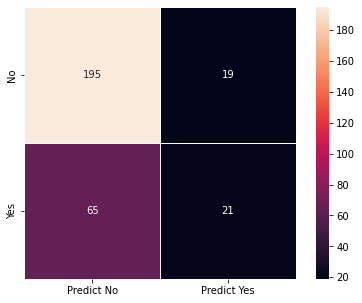

In [461]:
y_pred = adb.predict(X_test)
accuracies = cross_val_score(estimator = adb,X= X_train,y=y_train)
print(classification_report(y_test,y_pred))
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

cm = confusion_matrix(y_test,y_pred,labels = ["no","yes"])
df_cm = pd.DataFrame(cm,index=[i for i in ["No","Yes"]],columns = [i for i in["Predict No","Predict Yes"]])
plt.figure(figsize=(7,5))
sns.heatmap(data=df_cm,linewidths=.5, annot=True,square = True,fmt = 'g')


### GradientBoosting 

In [462]:
gdb = GradientBoostingClassifier(loss='exponential',learning_rate=0.05,n_estimators=200,criterion='mae',)
gdb.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mae', learning_rate=0.05,
                           loss='exponential', n_estimators=200)

In [463]:
print(gdb.score(X_train,y_train)*100,'%')
print(gdb.score(X_test,y_test)*100,'%')

73.71428571428571 %
72.0 %


              precision    recall  f1-score   support

          no       0.75      0.92      0.82       214
         yes       0.53      0.23      0.32        86

    accuracy                           0.72       300
   macro avg       0.64      0.57      0.57       300
weighted avg       0.68      0.72      0.68       300

Accuracy: 70.29 %


<AxesSubplot:>

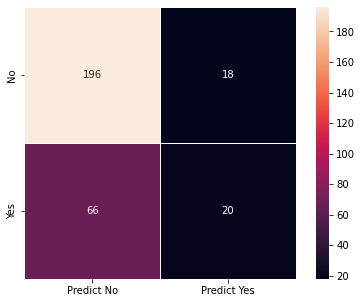

In [464]:
y_pred = gdb.predict(X_test)
accuracies = cross_val_score(estimator = gdb,X= X_train,y=y_train,cv=10)
print(classification_report(y_test,y_pred))
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

cm = confusion_matrix(y_test,y_pred,labels = ["no","yes"])
df_cm = pd.DataFrame(cm,index=[i for i in ["No","Yes"]],columns = [i for i in["Predict No","Predict Yes"]])
plt.figure(figsize=(7,5))
sns.heatmap(data=df_cm,linewidths=.5, annot=True,square = True,fmt = 'g')


### Bagging Classifier

In [465]:
bgc = BaggingClassifier(n_estimators = 3,random_state=1)
bgc.fit(X_train,y_train)

BaggingClassifier(n_estimators=3, random_state=1)

In [466]:
print(bgc.score(X_train,y_train)*100,'%')
print(bgc.score(X_test,y_test)*100,'%')

93.57142857142857 %
71.33333333333334 %


              precision    recall  f1-score   support

          no       0.79      0.81      0.80       214
         yes       0.50      0.47      0.48        86

    accuracy                           0.71       300
   macro avg       0.65      0.64      0.64       300
weighted avg       0.71      0.71      0.71       300

Accuracy: 66.71 %


<AxesSubplot:>

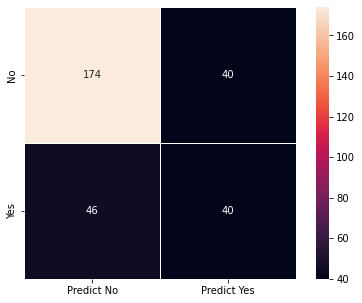

In [467]:
y_pred = bgc.predict(X_test)
accuracies = cross_val_score(estimator = bgc,X= X_train,y=y_train,cv=10)
print(classification_report(y_test,y_pred))
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

cm = confusion_matrix(y_test,y_pred,labels = ["no","yes"])
df_cm = pd.DataFrame(cm,index=[i for i in ["No","Yes"]],columns = [i for i in["Predict No","Predict Yes"]])
plt.figure(figsize=(7,5))
sns.heatmap(data=df_cm,linewidths=.5, annot=True,square = True,fmt = 'g')


Bagging classifier is giving the worst results with and without the scaling so its better not to consider it at all for this data

# My conclusion

For this dataset, I have performed data cleaning and other data analysis and then tried lots of combination of hyperparameters on 8 different Machine Learning algorithms. 
Also, I had tried the algorithm once with scaling and without scaling. My observations are:

Without Scaling:
Decision Tree, AdaBoost, KNN, SVM, Gradient Boost,Logistic gave a good confusion matrix score. 

For the confusion matrix score I have assumed that the False Negative score to be better than the False Positive score i.e., Model predicting the person is defaulter but in fact the person is not a defaulter. And both True Negative and True Positive scores too. The above models gave good False Negative True Negative and True positive score.

In case of Accuracy AdaBoost was the best model here without the scaling.

With Scaling:
Most of the distance based model's scores have been increased and Decision Tree's confusing matrix has improved quite a bit compared to the previous one.

Accuracy wise again AdaBoost has the better accuracy with no overfitting at all.

So for this dataset i conclude that AdaBoost algorithm was best compared to others 